Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5962
           1       1.00      0.82      0.90        38

    accuracy                           1.00      6000
   macro avg       1.00      0.91      0.95      6000
weighted avg       1.00      1.00      1.00      6000



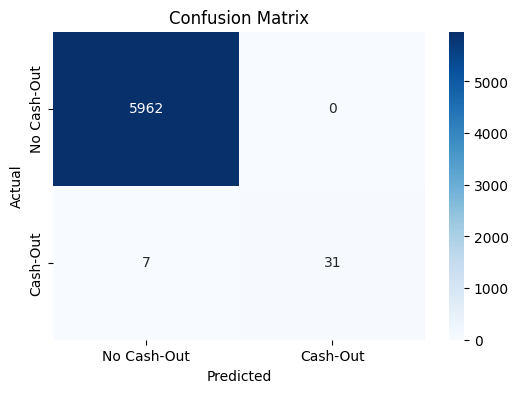

['atm_cashout_model.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
df = pd.read_csv("atm_cashout_data.csv")

# Step 2: Data Preprocessing
# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Encode categorical variable (Day_of_Week)
label_encoder = LabelEncoder()
df["Day_of_Week"] = label_encoder.fit_transform(df["Day_of_Week"])

# Select features and target variable
features = ["Total_Cash", "Withdrawal_Amount", "Deposit_Amount", "Transaction_Count", "Day_of_Week"]
target = "Cash_Out"

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Cash-Out", "Cash-Out"], yticklabels=["No Cash-Out", "Cash-Out"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model (optional)
import joblib
joblib.dump(model, "atm_cashout_model.pkl")
